Including all data:
Mean: 0.777103209019948
-------  -------  -------  -------  -------  -------  -------  ---------  ----------  -----------
   0       1        2       3        4       5        6        7          8           9
1042     860      307      78       15       3        0        0          0           1
1060.15  823.847  320.107  82.9187  16.1091  2.50369  0.32427  0.0359988  0.00349685  0.000301935
-------  -------  -------  -------  -------  -------  -------  ---------  ----------  -----------
Chi2: 3313.2395174607573
p-value: 0.0
Ommiting the last bin:
Mean: 0.7735357917570499
-------  -------  ------  -------  ------  -------  --------  ---------  ----------
   0       1        2      3        4      5        6         7          8
1042     860      307     78       15      3        0         0          0
1063.48  822.638  318.17  82.0387  15.865  2.45442  0.316431  0.0349672  0.00338105
-------  -------  ------  -------  ------  -------  --------  ---------  ---------

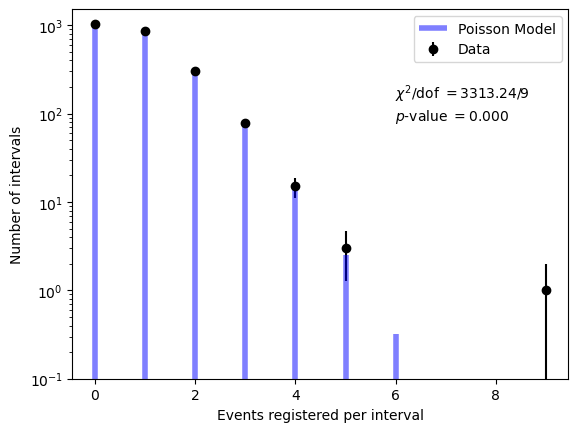

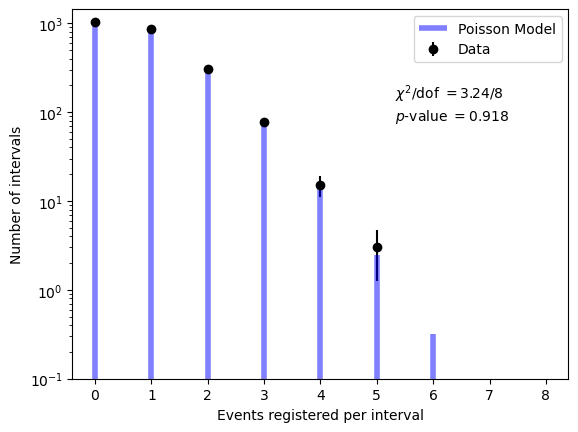

In [3]:
import numpy as np
from scipy.stats import poisson, chi2
from tabulate import tabulate
import matplotlib.pyplot as plt

def run_analysis( nevs, ncounts, save ):

    tot_counts = np.sum(ncounts)
    wtd_counts = np.sum( nevs*ncounts )

    expec = wtd_counts / tot_counts

    print('Mean:', expec)

    prd_counts = tot_counts * poisson.pmf( nevs, expec )

    print( tabulate( [nevs, ncounts, prd_counts] ) )

    chisq = np.sum( (ncounts - prd_counts)**2 / prd_counts )
    pval = chi2.sf( chisq, len(prd_counts)-1 )

    print('Chi2:', chisq)
    print('p-value:', pval)

    fig, ax = plt.subplots()
    ax.errorbar( nevs, ncounts, ncounts**0.5, fmt='ko', label='Data' )
    ax.vlines( nevs, 0, tot_counts*poisson.pmf( nevs, expec ), colors='b', lw=4, alpha=0.5, label='Poisson Model' )
    ax.set_yscale('log')
    ax.set_xlabel('Events registered per interval')
    ax.set_ylabel('Number of intervals')
    ax.legend()

    ax.text(0.65, 0.76, f'$\chi^2/$dof $= {chisq:4.2f}/{len(nevs)-1}$', transform=ax.transAxes)
    ax.text(0.65, 0.70, f'$p$-value $= {pval:5.3f}$', transform=ax.transAxes )
    ax.set_ylim(bottom=1e-1)

    fig.savefig(f'{save}.pdf')

    return expec, chisq, pval

nevs    = np.arange(10)
ncounts = np.array( [1042, 860, 307, 78, 15, 3, 0, 0, 0, 1] )

print('Including all data:')
run_analysis( nevs, ncounts, "all" )

print('Ommiting the last bin:')
run_analysis(nevs[:-1], ncounts[:-1], "nolastbin")

plt.show()